In [50]:
import numpy as np
import pandas as pd
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [51]:
PATH_TO_DATA = 'C:/Users/Nina/Downloads/Библиотеки Python для Data Science_Юлия Пономарева/Практика к уроку 2/Классификация вина/'
FILENAME_1 = 'winequality-red.csv'#красное вино
FILENAME_2 = 'winequality-white.csv' #белое вино

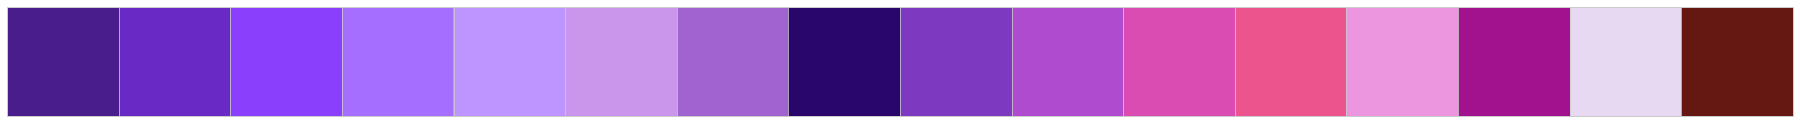

In [52]:
purple = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#BE95FF', '#CA96EC', '#A163CF', '#29066B',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

sns.palplot(purple, size = 2)

In [53]:
df_rw = pd.read_csv(PATH_TO_DATA+FILENAME_1, sep=';')
df_ww = pd.read_csv(PATH_TO_DATA+FILENAME_2, sep=';')

In [54]:
df_rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [55]:
df_rw.head().style.background_gradient(cmap='rocket')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5


In [56]:
df_ww.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [57]:
#Единый стиль графиков
large = 16; med = 14; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (10, 8),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')

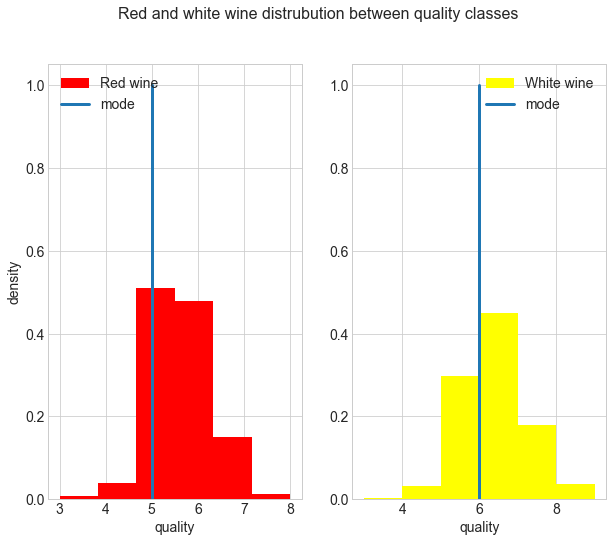

In [58]:
# гистограммы распределения целевой переменной ('quality') обоих датасетов (красное и белое вино).  
y = [0, 1]
mode = [df_rw['quality'].mode()[0]] * 2

plt.subplot(121)
df_rw['quality'].hist(density=True, bins=6, label='Red wine', color='red')
plt.plot(mode, y, label='mode', linewidth=3)
plt.ylabel('density')
plt.xlabel('quality')
plt.legend(loc='upper left')

mode = [df_ww['quality'].mode()[0]] * 2
plt.subplot(122)
df_ww['quality'].hist(density=True, bins=6, label='White wine', color='yellow')
plt.plot(mode, y, label='mode', linewidth=3)
plt.xlabel('quality')

plt.suptitle('Red and white wine distrubution between quality classes')
plt.legend(loc='upper right')

plt.show()

Вывод: в представленных выборках распределение вин на классы не сбаллансировано. Преобладают вина 5, 6 классов, но мало образцов 3, 4, 8, 9 классов

In [59]:
#Деление признаков на хим.состав и хим.свойства
substances = ['citric acid', 
              'residual sugar', 
              'chlorides', 
              'free sulfur dioxide', 
              'total sulfur dioxide', 
             'sulphates', 
             'alcohol', 'quality']

features = ['fixed acidity', 
         'volatile acidity',
           'density', 
           'pH', 'quality']


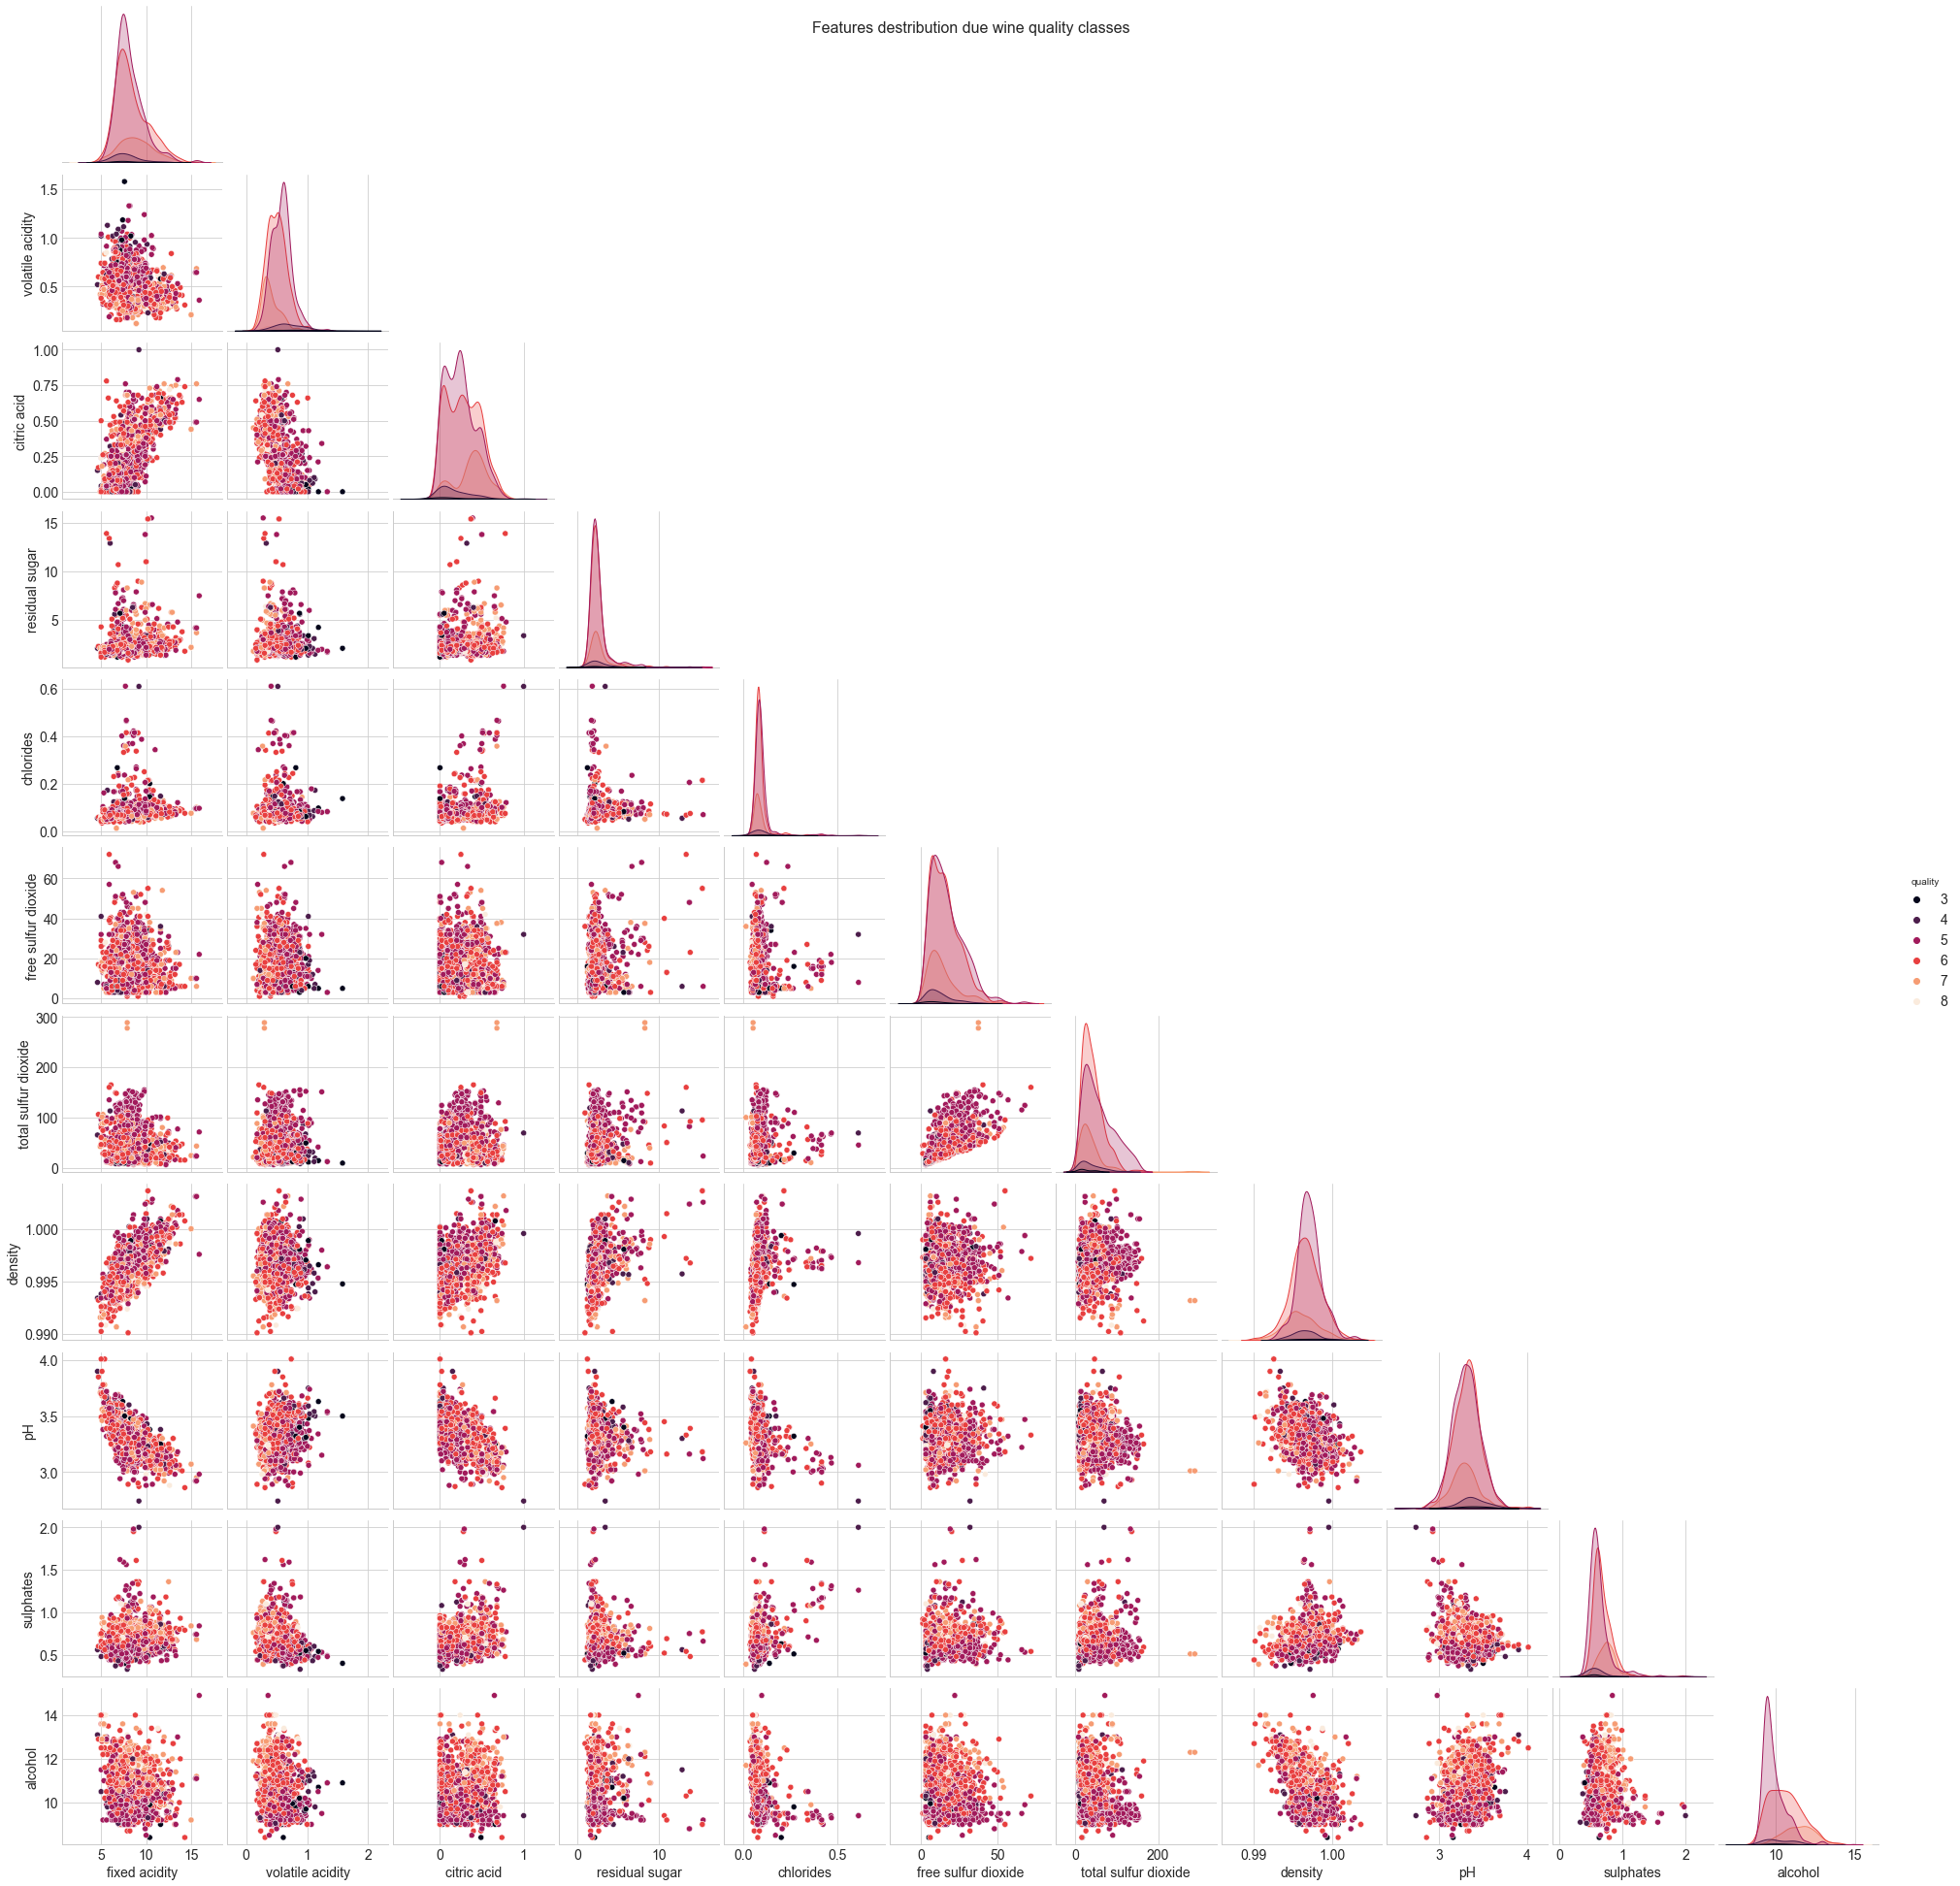

In [60]:
# парные графики для визуализации зависимости и распределения признаков
sns.pairplot(df_rw, hue='quality', corner=True, palette='rocket')
plt.suptitle('Features destribution due wine quality classes')
plt.show()

Text(0.5, 1.0, 'Corr_matrix between feachures and target')

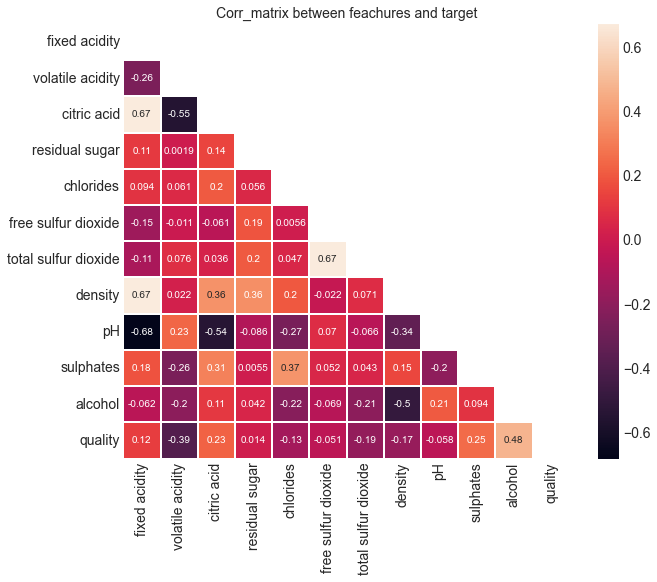

In [61]:
mask = np.triu(np.ones_like(df_rw.corr(), dtype=np.bool))
sns.heatmap(df_rw.corr(), mask=mask, annot=True, cmap='rocket', linewidths=2)
plt.title('Corr_matrix between feachures and target')

Text(0.5, 1.0, "Gradetion of wine quality feature's correlation")

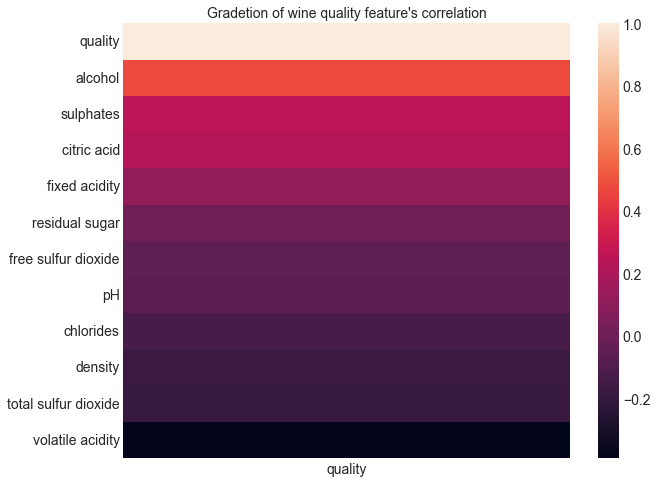

In [62]:
# Визуализация корреляции признаков с таргетом (упорядочены по значениям корреляции)
sns.heatmap(df_rw.corr()[['quality']].sort_values('quality',ascending=False), cmap='rocket')
plt.title("Gradetion of wine quality feature's correlation")

Вывод: качество вина тем выше , чем ниже летучая кислотность, и выше содержание спиртов и сульфатов.
Летучая кислотность характеризует появление нежелательных побочных веществ в структуре вина (уксусная, которая окисляет этанол, а также этилацетат (ethyl acetate), являющимся источником неприятных запахов в вине)

Из модели можно исключить признаки , слабо коррелирующие с таргетом:
- сахара
- диоксиды
- pH
- плотность

Есть ощутимая обратная корреляция между: 
- плотностью и содержанием алкоголя
- летучей кислотностью и содержанием аскорбиновой кислоты
- pH, фиксированной кислотностью и содержанием аскорбиновой кислоты

Данные признаки мультиколлинеарны. Значит, какое-то из них нужно убирать , чтобы они не порушили математику модели. Отбор признаков для модели проведу по итогам анализа следующих графиков


Построю график boxplot, чтобы посмотреть распределение признаков в зависимости от качества вина. Это позволит выявить наиболее сбалансированные и коррелирующие признаки, которые в дальнейшем лягут в основу модели классификации


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


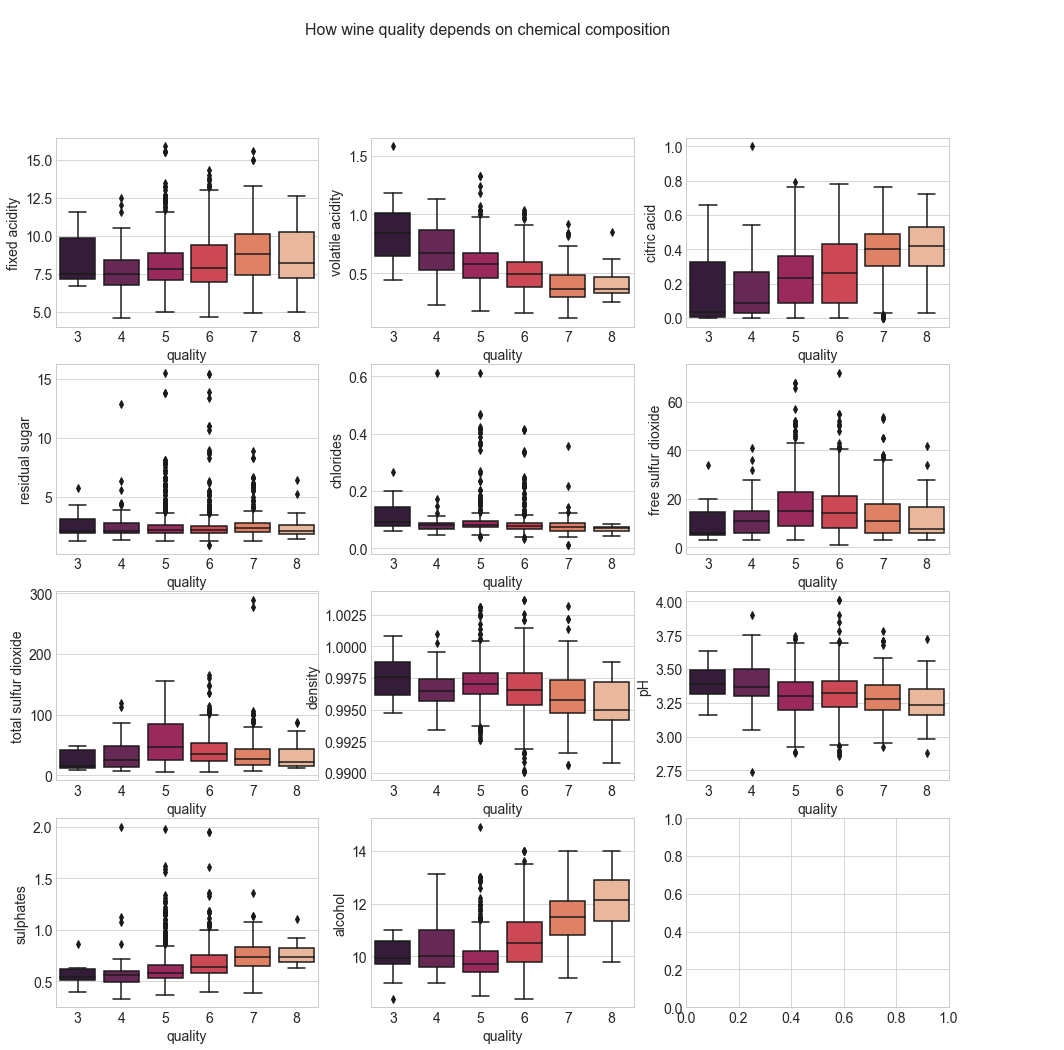

In [63]:
clases = df_rw['quality'].unique().sort()
all_features = enumerate((df_rw.drop('quality', axis=1).columns))
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
axes = axes.flatten()

for n, f in all_features:
    sns.boxplot(ax=axes[n], x=df_rw['quality'], y=df_rw[f], palette='rocket', )

    
plt.suptitle('How wine quality depends on chemical composition')
fig.legend(labels=clases, loc="upper right")
plt.show()

В целом признаки  сбалансированы. Из 11 признаков для модели классификации можно выбрать пять основных 
Итак, в основу модели классифкации можно положить наиболее сбалансированные и коррелирующие признаки:
- citric acid - аскорбиновая кислота (в признаке практически отсутвуют выбросы, есть четкая обратно-пропорциональная зависимость с качеством вина, признак сильно коррелирует с двумя ключевыми показателями характеристик вина: финсированная и летучая кислотности
- alcohol - содержание спиртов (прямая корреляция с качесвтом вина, незначительные выбросы , слабые корреляции с другими признаками)
- sulphates - сульфаты и chlorides - хлориды. Эти два признака коррелируют с таргетом. В хорошем вине должны быть в балансе. Признак chlorides есть значительные выбросы. Нужно от них избавиться
- total sulfur dioxide (общий диоксид серы) - есть корреляция с качеством вина, незначитеоьные выбросы признака.

Все признаки характеризуют хим.состав вина

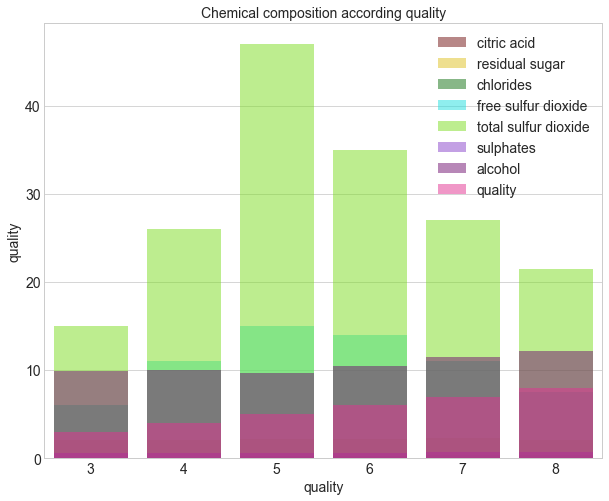

In [64]:
# color = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
#           '#BE95FF', '#CA96EC', '#A163CF', '#29066B',
#           '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
#           '#EC96E0', '#A2128E', '#E8D9F3', '#641811']
color = ['maroon', 'gold', 'green', 'cyan', 'lawngreen', 'blueviolet', 'purple', 'deeppink']
chim_median = df_rw.groupby('quality').median().reset_index()
chim_median
for i, c in enumerate(substances):
    sns.barplot(data=chim_median[substances], x='quality', y=c, alpha=0.5,  color=color[i], label=c)

plt.title('Chemical composition according quality')

plt.legend()
plt.show()